In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from IPython.display import Image

warnings.filterwarnings(action='ignore')
plt.show()

plt.style.use('seaborn') # matplotlib 테마
plt.rc('font', family='Malgun Gothic') # 그래프에서 한글 깨지는 현상 방지
plt.rc('axes', unicode_minus=False) # 그래프에서 s마이너스 기호가 표시되도록
pd.set_option('display.max_seq_items', None) # 컬럼 리스트 전부 출력
pd.set_option('display.max_columns', None) # 컬럼 생략 없이 출력
pd.set_option('display.max_rows', None) # 로우 생략 없이 출력
pd.set_option('display.width', None) # 너비

In [2]:
org = pd.read_csv("1wk_assignment_data.csv", encoding="UTF8")

In [3]:
data = org.copy()

# 데이터 불러오기 (35개 데이터)
* ##### Attrition : if the employee leaves the job -> target (종속변수) ( 0 or 1)
* Age : Employee age
* BusinessTravel : The frequency of job travels
* DailyRate : Billing cost for employee's services for a single day 
* Department : Employee work department
* DistanceFromHome : Distance traveled to work from home
* Education : Employee education level (1 = Below College, 2 = College, 3 = Bachelor, 4 = Master, 5 = Doctor)
* EducationField : Employee education field
* EmployeeCount :  Employee Count (Constant)
* EmployeeNumber : Employee ID
* EnvironmentSatisfaction : Numerical value for environment satisfaction (1 = Low, 2 = Medium, 3 = High, 4 = Very High)
* Gender : Employee gender
* HourlyRate : The amount of money that employee earns for every hour worked
* JobInvolvement : Numerical value for job involvement (1 = Low, 2 = Medium, 3 = High, 4 = Very High)
* JobLevel : Numerical value for job level
* JobRole : Employee job position
* JobSatisfaction : Numerical value for job satisfaction (1 = Low, 2 = Medium, 3 = High, 4 = Very High)
* MaritalStatus : Employee marital status
* MonthlyIncome : The amount of money that employee earns in one month, before taxes or deductions
* MonthlyRate : Billing cost for employee's services for a month
* NumCompaniesWorked : Number of companies worked at
* Over18 : if employee is over 18 years old
* OverTime : if employee works overtime
* PercentSalaryHike : Percent increase in salary
* PerformanceRating : Numerical value for performance rating (1 = Low, 2 = Good, 3 = Excellent, 4 = Outstanding)
* RelationshipSatisfaction : Numerical value for relationship satisfaction (1 = Low, 2 = Medium, 3 = High, 4 = Very High)
* StandardHours : Hours employee spent working (Constant)
* StockOptionLevel :  Numerical value for stock options
* TotalWorkingYears : Total number of years employee worked
* TrainingTimesLastYear : Hours employee spent on training last year
* WorkLifeBalance : Numerical value for work life balance (1 = Bad, 2 = Good, 3 = Better, 4 = Best)
* YearsAtCompany :Number of years employee worked at company
* YearsInCurrentRole : Number of years employee worked as their current job role
* YearsSinceLastPromotion : Number of years since last promotion
* YearsWithCurrManager : Number of years employee worked with current manager

In [4]:
data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

non-null로 결측치 없음을 확인

In [6]:
data.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  JobSatisfaction  MonthlyIncome   MonthlyRate  \
count  1470.000000      1470.000000    1470.000000   1470.000000   
mean      2.063946         2.728571    6502.931293  14313.103401   
std       1.106940         1.102846    4707.956783   7117.786044   
min       1.000000         1.000000    1009.000000   2094.000000   
25%       1.000000         2.000000    2911.000000   8047.000000   
50%       2.000000         3.000000    4919.000000  14235.500000   
75%       3.000000         4.000000    8379.000000  20461.500000   
max       5.000000         4.000000   19999.000000  26999.000000   

       NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
count         1470.000000        1470.000000        1470.000000   
mean             2.693197          15.209524           3.153741   
std              2.498009           3.659938           0.360824   
min              0.000000          11.000000           3.000000   
25%              1.000000          12.000000           3.000000   
50%              2.000000          14.000000           3.000000   
75%              4.000000          18.000000           3.000000   
max              9.000000          25.000000           4.000000   

       RelationshipSatisfaction  StandardHours  StockOptionLevel  \
count               1470.000000         1470.0       1470.000000   
mean                   2.712245           80.0          0.793878   
std                    1.081209            0.0          0.852077   
min                    1.000000           80.0          0.000000   
25%                    2.000000           80.0          0.000000   
50%                    3.000000           80.0          1.000000   
75%                    4.000000           80.0          1.000000   
max                    4.000000           80.0          3.000000   

       TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count        1470.000000            1470.000000      1470.000000   
mean           11.279592               2.799320         2.761224   
std             7.780782               1.289271         0.706476   
min             0.000000               0.000000         1.000000   
25%             6.000000               2.000000         2.000000   
50%            10.000000               3.000000         3.000000   
75%            15.000000               3.000000         3.000000   
max            40.000000               6.000000         4.000000   

       YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count     1470.000000         1470.000000              1470.

수치형 자료들의 요약 ( 범주형 자료 제외 )

# 1. EDA 
* 수치형 자료 : "Education", "EnvironmentSatisfaction", "JobInvolvement", "JobSatisfaction", "PerformanceRating", "RelationshipSatisfaction", "WorkLifeBalance"
* target : Attrition
* 범주형 자료 : 나머지 feature

#### 1-1 데이터 전처리

- 고유값 확인 및 제거

In [7]:
for column in data.columns :
    print(f"{column} : {data[column].nunique()}")

Age : 43
Attrition : 2
BusinessTravel : 3
DailyRate : 886
Department : 3
DistanceFromHome : 29
Education : 5
EducationField : 6
EmployeeCount : 1
EmployeeNumber : 1470
EnvironmentSatisfaction : 4
Gender : 2
HourlyRate : 71
JobInvolvement : 4
JobLevel : 5
JobRole : 9
JobSatisfaction : 4
MaritalStatus : 3
MonthlyIncome : 1349
MonthlyRate : 1427
NumCompaniesWorked : 10
Over18 : 1
OverTime : 2
PercentSalaryHike : 15
PerformanceRating : 2
RelationshipSatisfaction : 4
StandardHours : 1
StockOptionLevel : 4
TotalWorkingYears : 40
TrainingTimesLastYear : 7
WorkLifeBalance : 4
YearsAtCompany : 37
YearsInCurrentRole : 19
YearsSinceLastPromotion : 16
YearsWithCurrManager : 18


feature들 중 고유값이 1470개인 "EmployeeNumber" 와 고유값이 1개인 "EmployeeCount", "Over18", "StandardHours" 잘못된 feature들로 판단하여 제거

In [8]:
data.drop(['EmployeeNumber','EmployeeCount', 'Over18', 'StandardHours'], axis= 1 , inplace=True)

* 수치형 -> 범주형 자료로 변환

In [9]:
education_dict = {1 : "Below College", 2 : "College", 3 : "Bachelor", 4 : "Master", 5 : "Doctor"}
level_dict = {1 : "LOW", 2 : "Medium", 3 : "High", 4 : "Very High"}
performance_dict = {1 :"Low", 2 : "Good", 3 : "Excellent", 4 : "Outstanding"}
balance_dict = {1 : "Bad", 2 : "Good", 3 : "Better", 4 : "Best"}

데이터 불러올 때, 해당 feature 별로 범주 형태 주어짐

In [10]:
data.replace({'Education': education_dict, 'EnvironmentSatisfaction': level_dict, 
              'JobInvolvement': level_dict, 'JobSatisfaction': level_dict,
              'PerformanceRating': performance_dict, 'RelationshipSatisfaction': level_dict, 
              'WorkLifeBalance': balance_dict}, inplace=True)

* NumCompaniesWorked

NumCompaniesWorked는 일한 회사의 수임으로, 최솟값을 0으로 가지고 있다. 하지만 IBM이 첫 회사가 아닌 이상 >=1 의 값을 가져야 한다. 따라서 0이기 위해서는 TotalWorkingYears와 YearsAtCompany이 값은 같이어야 한다.

In [11]:
data[data["NumCompaniesWorked"] == 0][['NumCompaniesWorked','TotalWorkingYears','YearsAtCompany']]

NumCompaniesWorked  TotalWorkingYears  YearsAtCompany
5                      0                  8               7
8                      0                 10               9
10                     0                  6               5
11                     0                 10               9
13                     0                  3               2
16                     0                  7               6
20                     0                  5               4
22                     0                 13              12
27                     0                 10               9
46                     0                 10               9
69                     0                  2               1
71                     0                  6               5
76                     0                 16              15
91                     0                 11              10
96                     0                  4               3
98                     0                 38              37
113                    0                  6               5
117                    0                 10               9
121                    0                  8               7
128                    0                  3               2
139                    0                 12              11
144                    0                  9               8
146                    0                  6               5
170                    0                  6               5
171                    0                  1               0
176                    0                  4               3
190                    0                 34              33
217                    0                  7               6
223                    0                 17              16
224                    0                  6               5
239                    0                  4               3
241                    0                  4               3
244                    0                 25              24
251                    0                 20              19
255                    0                  5               4
256                    0                 10               9
257                    0                 22              21
259                    0                  6               5
266                    0                 10               9
268                    0                 21              20
269                    0                 16              15
270                    0                 37              36
297                    0                 12              11
302                    0                  9               8
304                    0                 19              18
309                    0                  6               5
312                    0                  3               2
315                    0                  9               8
331                    0                  6               5
337                    0                  4               3
341                    0                 12              11
344                    0                 17              16
350                    0                  4               3
369                    0                  3               2
382                    0                  7               6
402                    0                  6               5
413                    0                  7               6
415                    0                  3               2
417                    0                 21              20
423                    0                 10               9
425                    0                 28              27
426                    0                 12              11
430                    0                  6               5
437                    0                  4               3
452                    0                  9               8
453                    0                  8   

TotalWorkingYears와 YearsAtCompany이 같은 값은 없으므로 이상하다고 판단하여 NumCompaniesWorked feature도 제거하고자 한다.

In [12]:
data.drop(['NumCompaniesWorked'], axis= 1 , inplace=True)

In [13]:
data.describe()

Age    DailyRate  DistanceFromHome   HourlyRate     JobLevel  \
count  1470.000000  1470.000000       1470.000000  1470.000000  1470.000000   
mean     36.923810   802.485714          9.192517    65.891156     2.063946   
std       9.135373   403.509100          8.106864    20.329428     1.106940   
min      18.000000   102.000000          1.000000    30.000000     1.000000   
25%      30.000000   465.000000          2.000000    48.000000     1.000000   
50%      36.000000   802.000000          7.000000    66.000000     2.000000   
75%      43.000000  1157.000000         14.000000    83.750000     3.000000   
max      60.000000  1499.000000         29.000000   100.000000     5.000000   

       MonthlyIncome   MonthlyRate  PercentSalaryHike  StockOptionLevel  \
count    1470.000000   1470.000000        1470.000000       1470.000000   
mean     6502.931293  14313.103401          15.209524          0.793878   
std      4707.956783   7117.786044           3.659938          0.852077   
min      1009.000000   2094.000000          11.000000          0.000000   
25%      2911.000000   8047.000000          12.000000          0.000000   
50%      4919.000000  14235.500000          14.000000          1.000000   
75%      8379.000000  20461.500000          18.000000          1.000000   
max     19999.000000  26999.000000          25.000000          3.000000   

       TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
count        1470.000000            1470.000000     1470.000000   
mean           11.279592               2.799320        7.008163   
std             7.780782               1.289271        6.126525   
min             0.000000               0.000000        0.000000   
25%             6.000000               2.000000        3.000000   
50%            10.000000               3.000000        5.000000   
75%            15.000000               3.000000        9.000000   
max            40.000000               6.000000       40.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count         1470.000000              1470.000000           1470.000000  
mean             4.229252                 2.187755              4.123129  
std              3.623137                 3.222430              3.568136  
min              0.000000                 0.000000              0.000000  
25%              2.000000                 0.000000              2.000000  
50%              3.000000                 1.000000              3.000000  
75%              7.000000                 3.000000              7.000000  
max             18.000000                15.000000             17.000000

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   object
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   object
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

#### 1-2 결측치 및 이상치 검토

결측치는 위에서 non-null 형태인 것을 확인했음으로, 생략

* 이상치 검토

In [15]:
num_feature = ['Age','DailyRate','DistanceFromHome', 'HourlyRate', 'JobLevel', 'MonthlyIncome',
       'MonthlyRate', 'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']
cate_feature = ['BusinessTravel', 'Department', 
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'OverTime', 
       'PerformanceRating', 'RelationshipSatisfaction', 
       'WorkLifeBalance']

Text(0.5, 0.98, 'Histogram (Numerical Variables)')

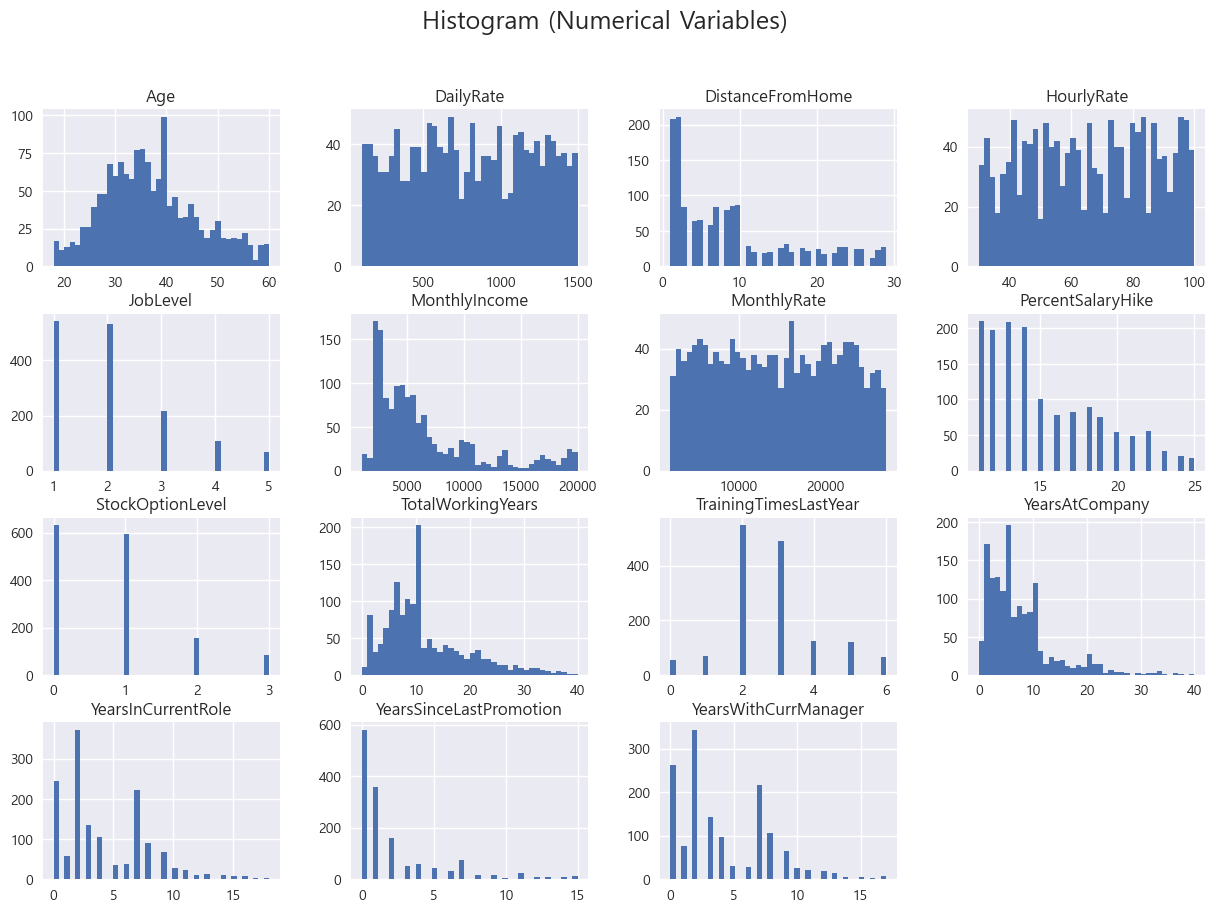

In [16]:
data[num_feature].hist(bins=40, figsize=(15,10))
plt.suptitle("Histogram (Numerical Variables)", fontsize=18)

각 데이터들을 봤을 때 크게 이상치로 느끼지 않음

1-3 유의미한 시각화 5개 이상

In [17]:
# 데이터 시각화를 위한 함수를 만듬
def bar_plot(cols, target, data, title , hue = None):
    plt.figure(figsize=(12,8))
    sns.barplot(x=cols, y=target, data = data, hue = hue)
    plt.title(title)

def point_plot(cols, target, data, title , hue = None):
    plt.figure(figsize=(12,8))
    sns.pointplot(x=cols, y=target, data = data, hue = hue)
    plt.xticks(rotation =45) # x 축 눈금 레이블 회전
    
    plt.title(title)

def box_plot(cols, target, data, title , hue = None):
    plt.figure(figsize=(12,8))
    sns.boxplot(x=cols, y=target, data = data, hue = hue)
    plt.xticks(rotation =45) # x 축 눈금 레이블 회전
    plt.title(title)

def count_plot(cols, data, title, hue = None):
    plt.figure(figsize=(12,8))
    sns.countplot(x=cols, data = data, hue = hue)
    plt.xticks(rotation =45) # x 축 눈금 레이블 회전
    plt.title(title)

In [18]:
data['Attrition'].replace(['Yes','No'],[1,0],inplace=True)

In [19]:
def pie_plot(feature):
    plt.figure(figsize=(9,6))
    data[feature].value_counts().plot.pie(autopct='%.1f%%')

* Attrition (타겟 변수)


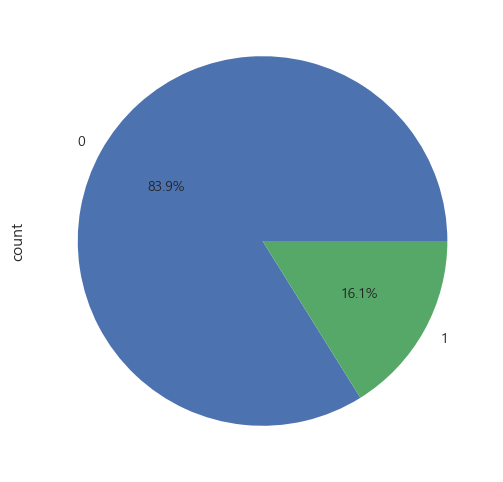

In [20]:
pie_plot("Attrition")


Yes(1, 이직)이 16.1%이고 No(0, 이직 안 함)이 83.9로 이직이 압도적으로 적은 것을 알 수 있다.

* Age

가정 : `20대 때에는 아직 나이가 적어 이직률이 높다가, 30대쯤부터 점점 이직률이 낮아지고 40~50대쯤부터 다시 이직률이   높아질 것이다.`

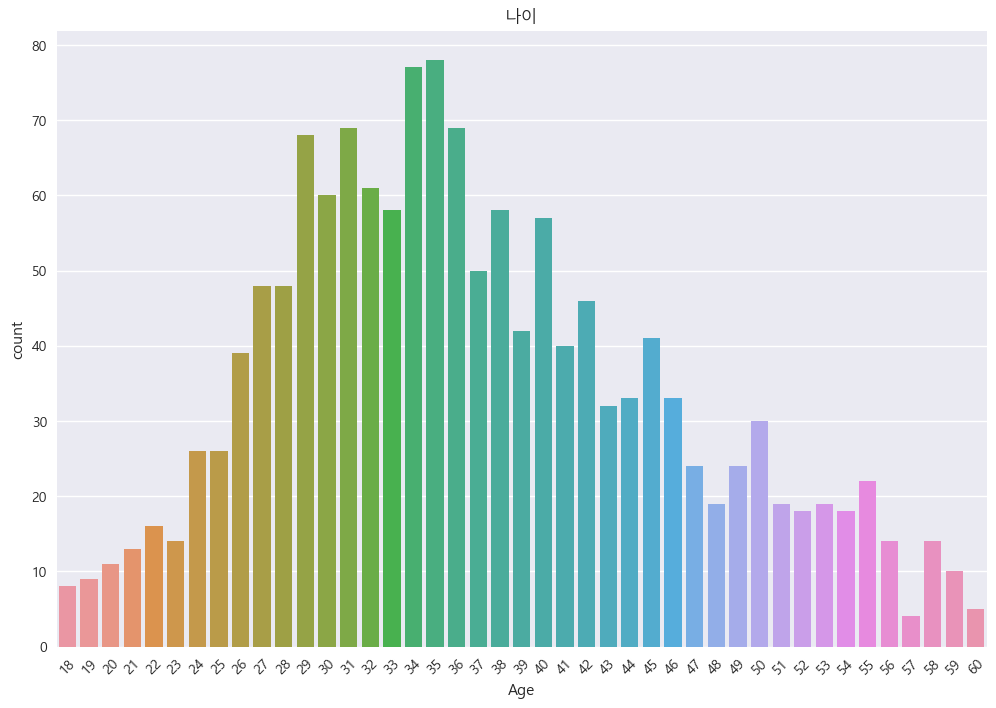

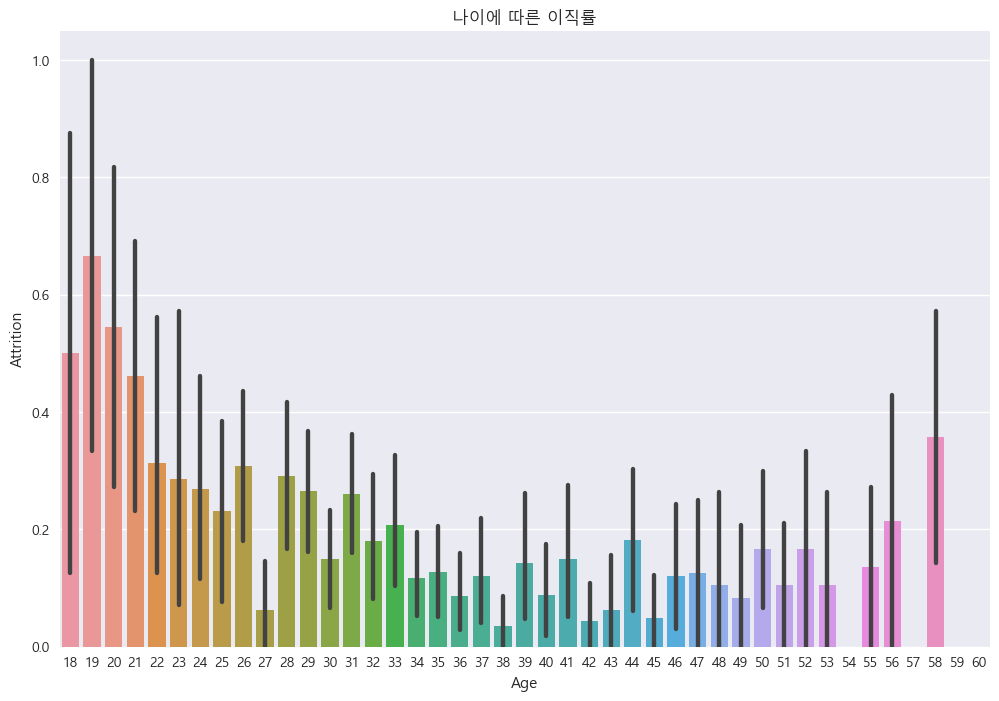

In [21]:
count_plot("Age", data, "나이")
bar_plot("Age","Attrition",data,"나이에 따른 이직률")

가설과 거의 흡사하나 20대 사회 초년생 때 생각보다 더 높은 이직률을 보였고, 또한 50대 이전까지는 비교적 이직률이 낮은 것을 확인할 수 있다. 

* MonthlyRate

가정 : `월급이 높으면 높을수록 이직률은 낮을 것이다. (반비례)`

<Axes: xlabel='MonthlyIncome', ylabel='Count'>

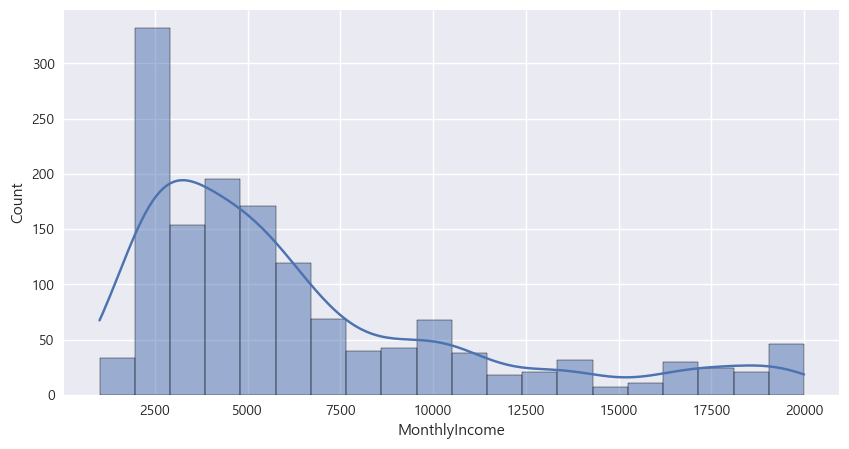

In [22]:
plt.figure(figsize=(10,5))
sns.histplot(data['MonthlyIncome'], kde = True) # 커널 밀도 추정 (그래프 매끄러운 곡선으로)

* BusinessTravel

가정 : `출장이 많으면 많을 수록 근무 난이도가 올라가기 때문에, 이직률이 높을 것이다.(비례)`

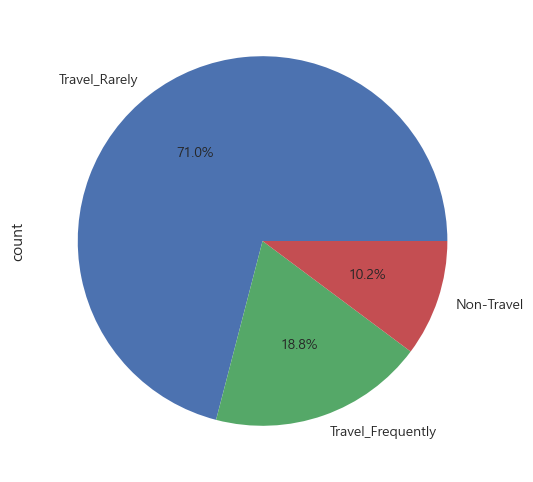

In [23]:
pie_plot("BusinessTravel")

전체적이 출장 빈도률을 봤을 때 자주 가는 사람은 18.8%이고, 아예 안 가는 사람은 10.2%이고, 대부분의 사람들 71%가 드물게 가는 것 같다.

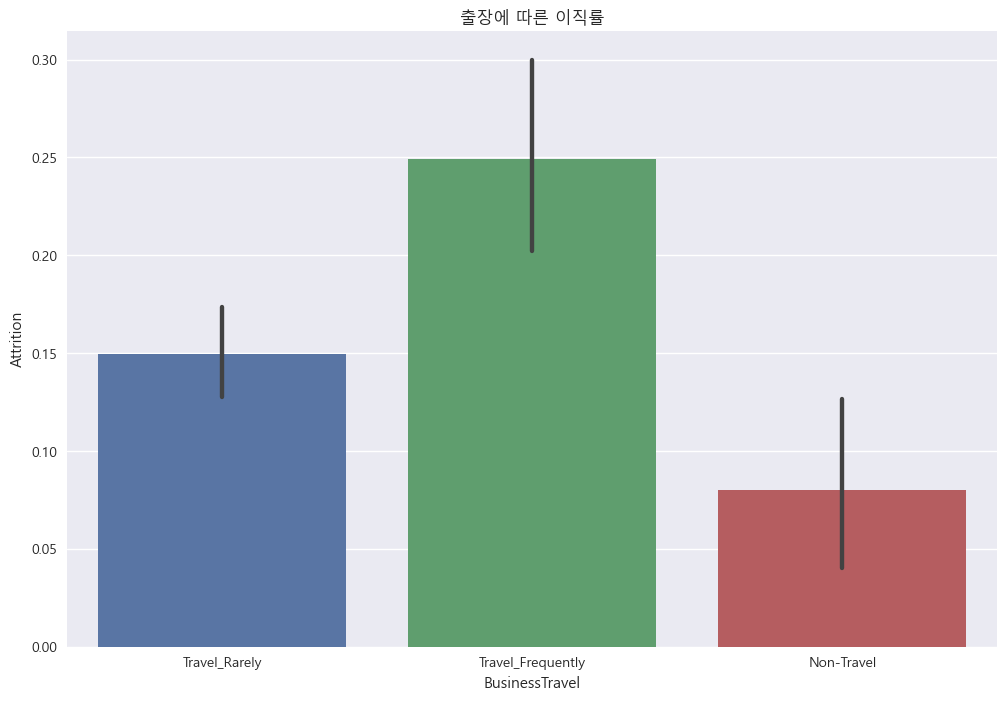

In [24]:
bar_plot('BusinessTravel', 'Attrition', data,'출장에 따른 이직률')

가정한 그대로, 출장이 빈번한 사람들이 이직률도 높은 것을 확인할 수 있다.

* DistanceFromHome

가정 : `집에서부터 회사까지의 거리가 멀면 멀수록 이직률 또한 높을 것이다 (거리 - 이직률 비례)`

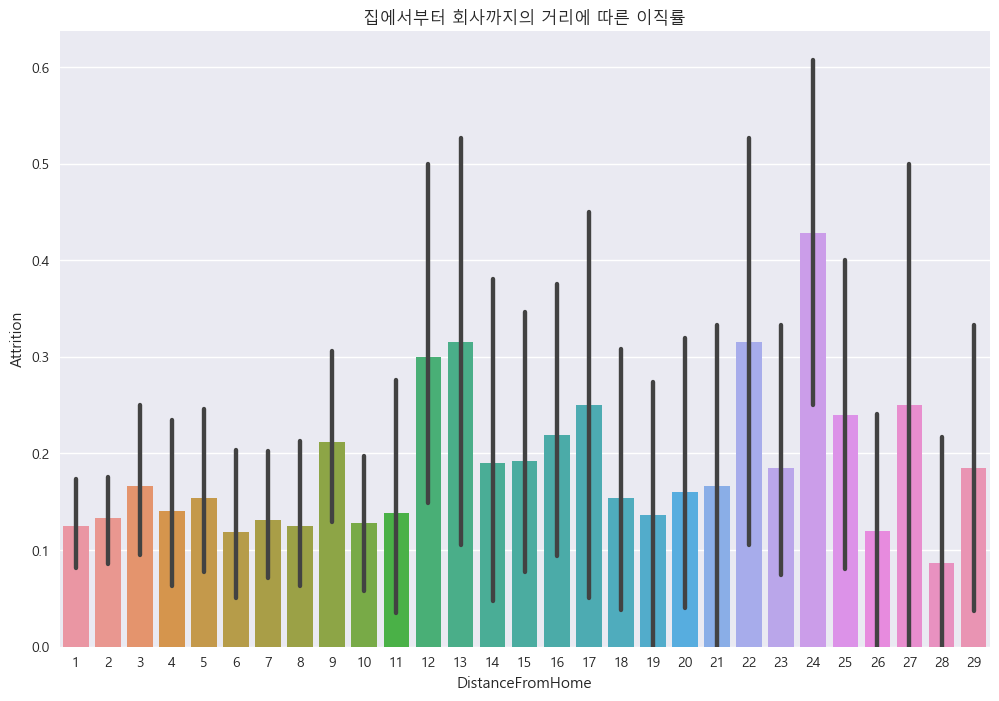

In [25]:
bar_plot("DistanceFromHome","Attrition",data,"집에서부터 회사까지의 거리에 따른 이직률")

거리에 따라서 이직률이 올라가는 우상향 그래프를 예상했으나, 거리가 비교적 가까운 사람들도 이직률이 높은 것으로 보인다.

따라서 거리(집-회사)와 이직률은 상관관계가 크지 않다고 볼 수 있다.(유의미함 x)

* EnvironmentSatisfaction

가정 : `환경만족도가 높으면 높을 수록 이직률은 낮을 것이다.(반비례)` 

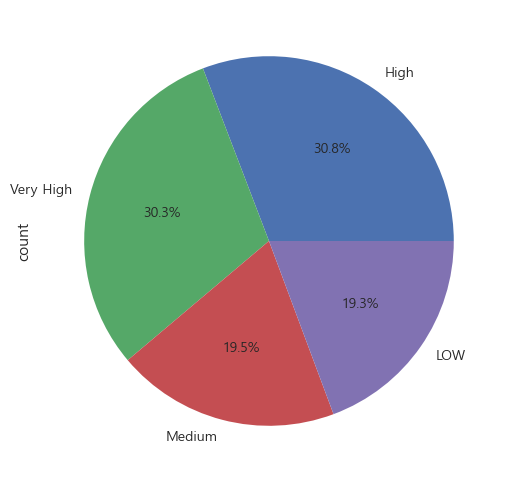

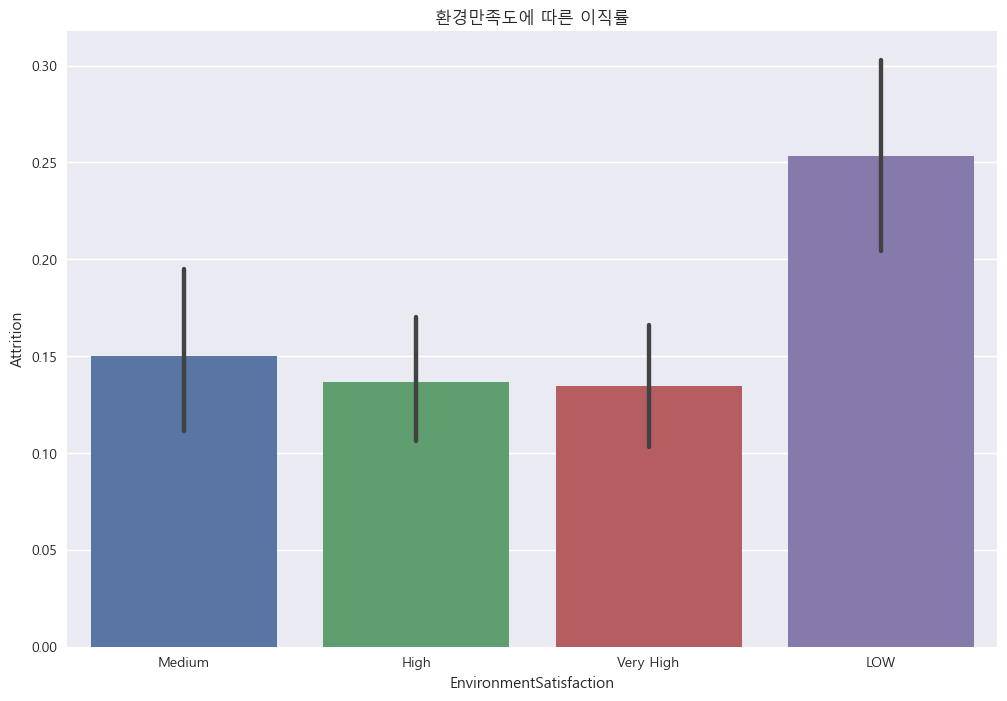

In [26]:
pie_plot("EnvironmentSatisfaction")
bar_plot("EnvironmentSatisfaction","Attrition",data,"환경만족도에 따른 이직률")

가정한 것처럼 환경만족도와 이직률은 반비례 관계를 가지고 있다. 

* OverTime

가정 : `야근이 많으면 많을 수록 이직률도 올라갈 것이다.`

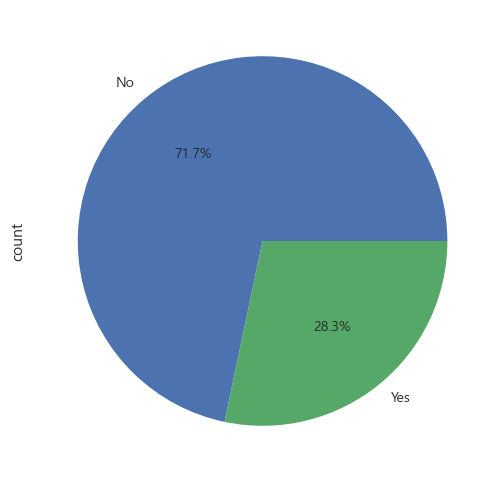

In [27]:
pie_plot("OverTime")

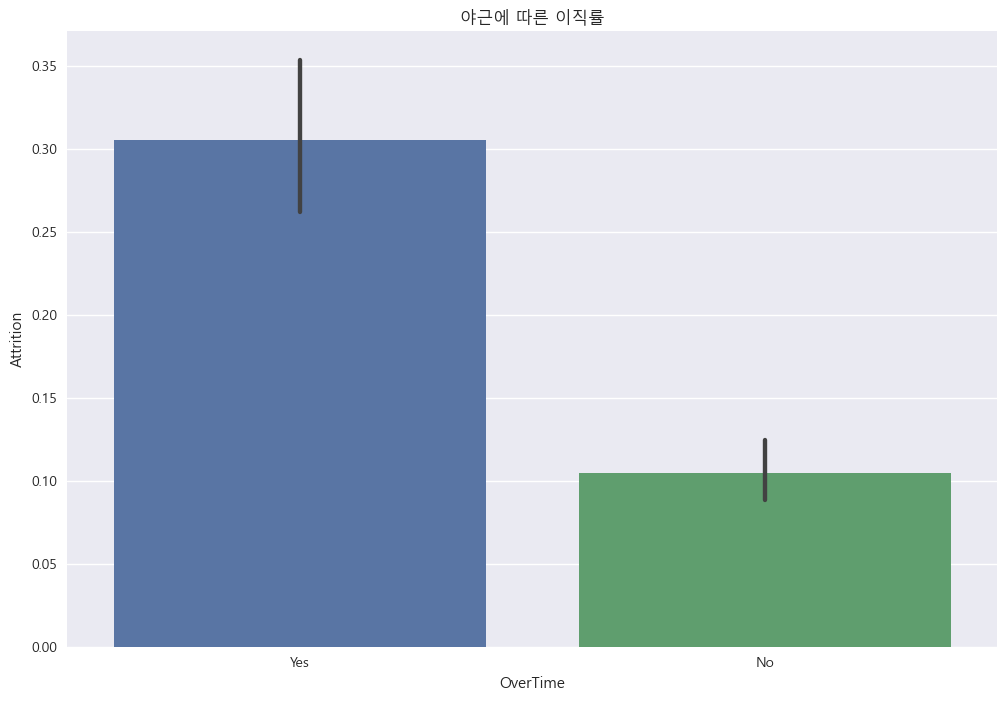

In [28]:
bar_plot("OverTime","Attrition",data,"야근에 따른 이직률")

가정과 그대로 야근이 많으면 많을수록 이직률도 올라가는 것을 알 수 있다.

* RelationshipSatisfaction

가정 : `어딜가나 인간관계는 굉장히 중요한 요소이다. 아무리 일이 힘들어도 사람들이 좋으면, 의지하면서 극복할 수 있는 것처럼 인간관계의 만족도가 높으면 높을수록 이직률도 낮을 것이다.`

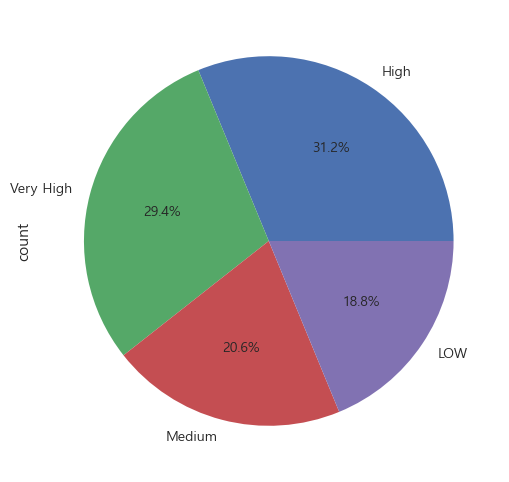

In [29]:
pie_plot("RelationshipSatisfaction")

각 영역별로 비슷한 분포를 확인할 수 있다.

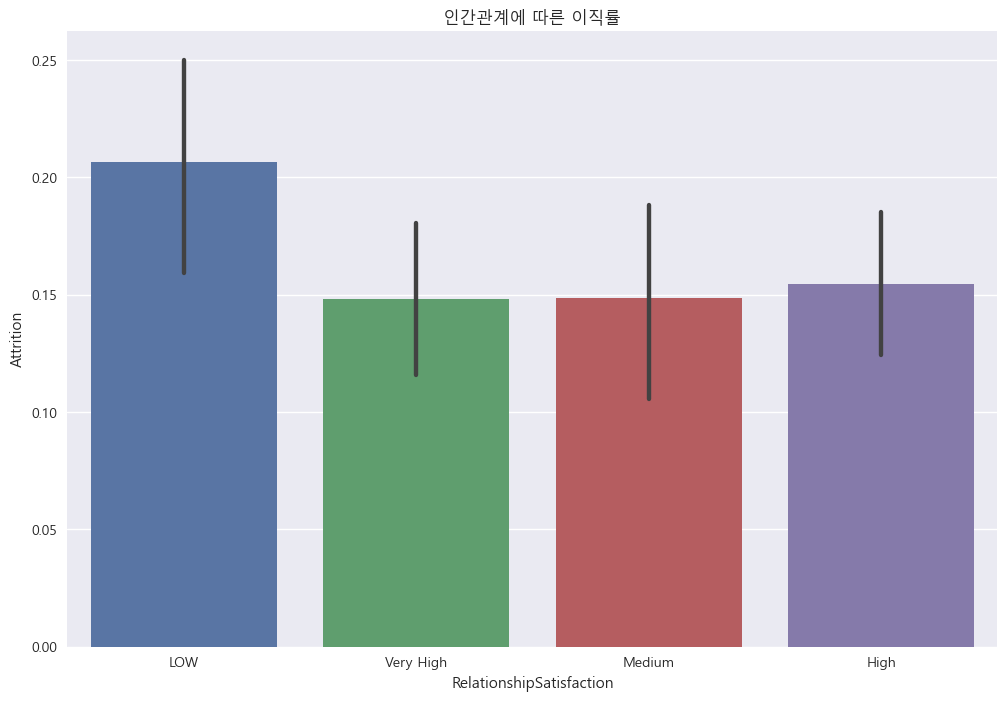

In [30]:
bar_plot("RelationshipSatisfaction","Attrition",data,"인간관계에 따른 이직률")

예상대로 인간관계 만족도가 낮은 사람들은 이직률이 높다는 것을 확인할 수 있다. 
그러나 만족도가 어느 일정 수준에 다다를 경우, (Medium 이상) 이직률에 더 이상 큰 영향을 주지 않는 것을 볼 수 있다. 
따라서, `인간관계가 좋으니까 이직을 하지 않는다.`는 맞다고 볼 수는 없을 것 같지만, `인간관계가 좋지 않으니까 이직을 한다.`는 맞다고 볼 수 있다.

#### 1-3 수치형 변수 간의 상관관계 파악

In [31]:
num_feature = ['Age','DailyRate','DistanceFromHome', 'HourlyRate', 'JobLevel', 'MonthlyIncome',
       'MonthlyRate', 'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']
num_cols_data_cor = data[num_feature].corr()
num_cols_data_cor

Age  DailyRate  DistanceFromHome  HourlyRate  \
Age                      1.000000   0.010661         -0.001686    0.024287   
DailyRate                0.010661   1.000000         -0.004985    0.023381   
DistanceFromHome        -0.001686  -0.004985          1.000000    0.031131   
HourlyRate               0.024287   0.023381          0.031131    1.000000   
JobLevel                 0.509604   0.002966          0.005303   -0.027853   
MonthlyIncome            0.497855   0.007707         -0.017014   -0.015794   
MonthlyRate              0.028051  -0.032182          0.027473   -0.015297   
PercentSalaryHike        0.003634   0.022704          0.040235   -0.009062   
StockOptionLevel         0.037510   0.042143          0.044872    0.050263   
TotalWorkingYears        0.680381   0.014515          0.004628   -0.002334   
TrainingTimesLastYear   -0.019621   0.002453         -0.036942   -0.008548   
YearsAtCompany           0.311309  -0.034055          0.009508   -0.019582   
YearsInCurrentRole       0.212901   0.009932          0.018845   -0.024106   
YearsSinceLastPromotion  0.216513  -0.033229          0.010029   -0.026716   
YearsWithCurrManager     0.202089  -0.026363          0.014406   -0.020123   

                         JobLevel  MonthlyIncome  MonthlyRate  \
Age                      0.509604       0.497855     0.028051   
DailyRate                0.002966       0.007707    -0.032182   
DistanceFromHome         0.005303      -0.017014     0.027473   
HourlyRate              -0.027853      -0.015794    -0.015297   
JobLevel                 1.000000       0.950300     0.039563   
MonthlyIncome            0.950300       1.000000     0.034814   
MonthlyRate              0.039563       0.034814     1.000000   
PercentSalaryHike       -0.034730      -0.027269    -0.006429   
StockOptionLevel         0.013984       0.005408    -0.034323   
TotalWorkingYears        0.782208       0.772893     0.026442   
TrainingTimesLastYear   -0.018191      -0.021736     0.001467   
YearsAtCompany           0.534739       0.514285    -0.023655   
YearsInCurrentRole       0.389447       0.363818    -0.012815   
YearsSinceLastPromotion  0.353885       0.344978     0.001567   
YearsWithCurrManager     0.375281       0.344079    -0.036746   

                         PercentSalaryHike  StockOptionLevel  \
Age                               0.003634          0.037510   
DailyRate                         0.022704          0.042143   
DistanceFromHome                  0.040235          0.044872   
HourlyRate                       -0.009062          0.050263   
JobLevel                         -0.034730          0.013984   
MonthlyIncome                    -0.027269          0.005408   
MonthlyRate                      -0.006429         -0.034323   
PercentSalaryHike                 1.000000          0.007528   
StockOptionLevel                  0.007528          1.000000   
TotalWorkingYears                -0.020608          0.010136   
TrainingTimesLastYear            -0.005221          0.011274   
YearsAtCompany                   -0.035991          0.015058   
YearsInCurrentRole               -0.001520          0.050818   
YearsSinceLastPromotion          -0.022154          0.014352   
YearsWithCurrManager             -0.011985          0.024698   

                         TotalWorkingYears  TrainingTimesLastYear  \
Age                               0.680381              -0.019621   
DailyRate                         0.014515               0.002453   
DistanceFromHome                  0.004628              -0.036942   
HourlyRate                       -0.002334              -0.008548   
JobLevel                          0.782208              -0.018191   
MonthlyIncome                     0.772893              -0.021736   
MonthlyRate                       0.026442               0.001467   
PercentSalaryHike                -0.020608              -0.005221   
StockOptionLevel                  0.010136               0.011274   
TotalWorkingYears        

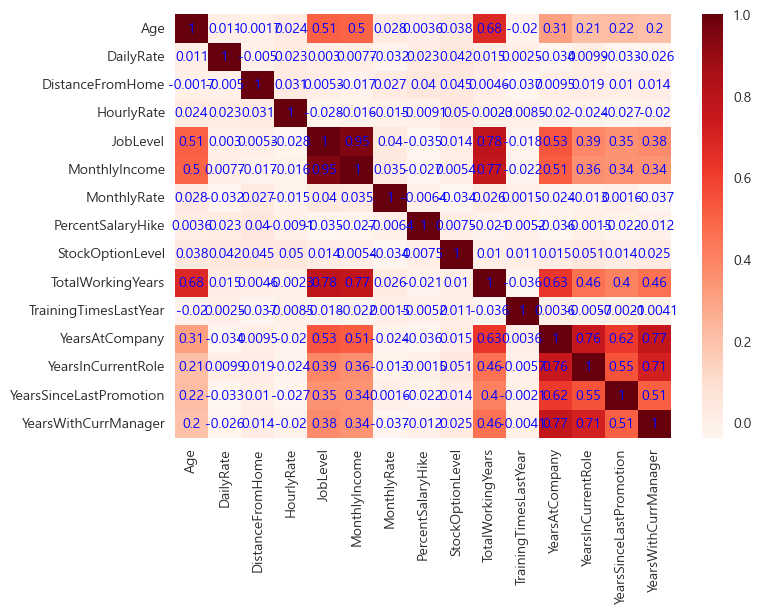

In [32]:
ax = sns.heatmap(num_cols_data_cor, annot=True, annot_kws=dict(color='b'), cmap='Reds') #annot : 각 cell의 값 표기 // cmap : colormap 
plt.show() # 히트맵 통해서 상관관계 시각화

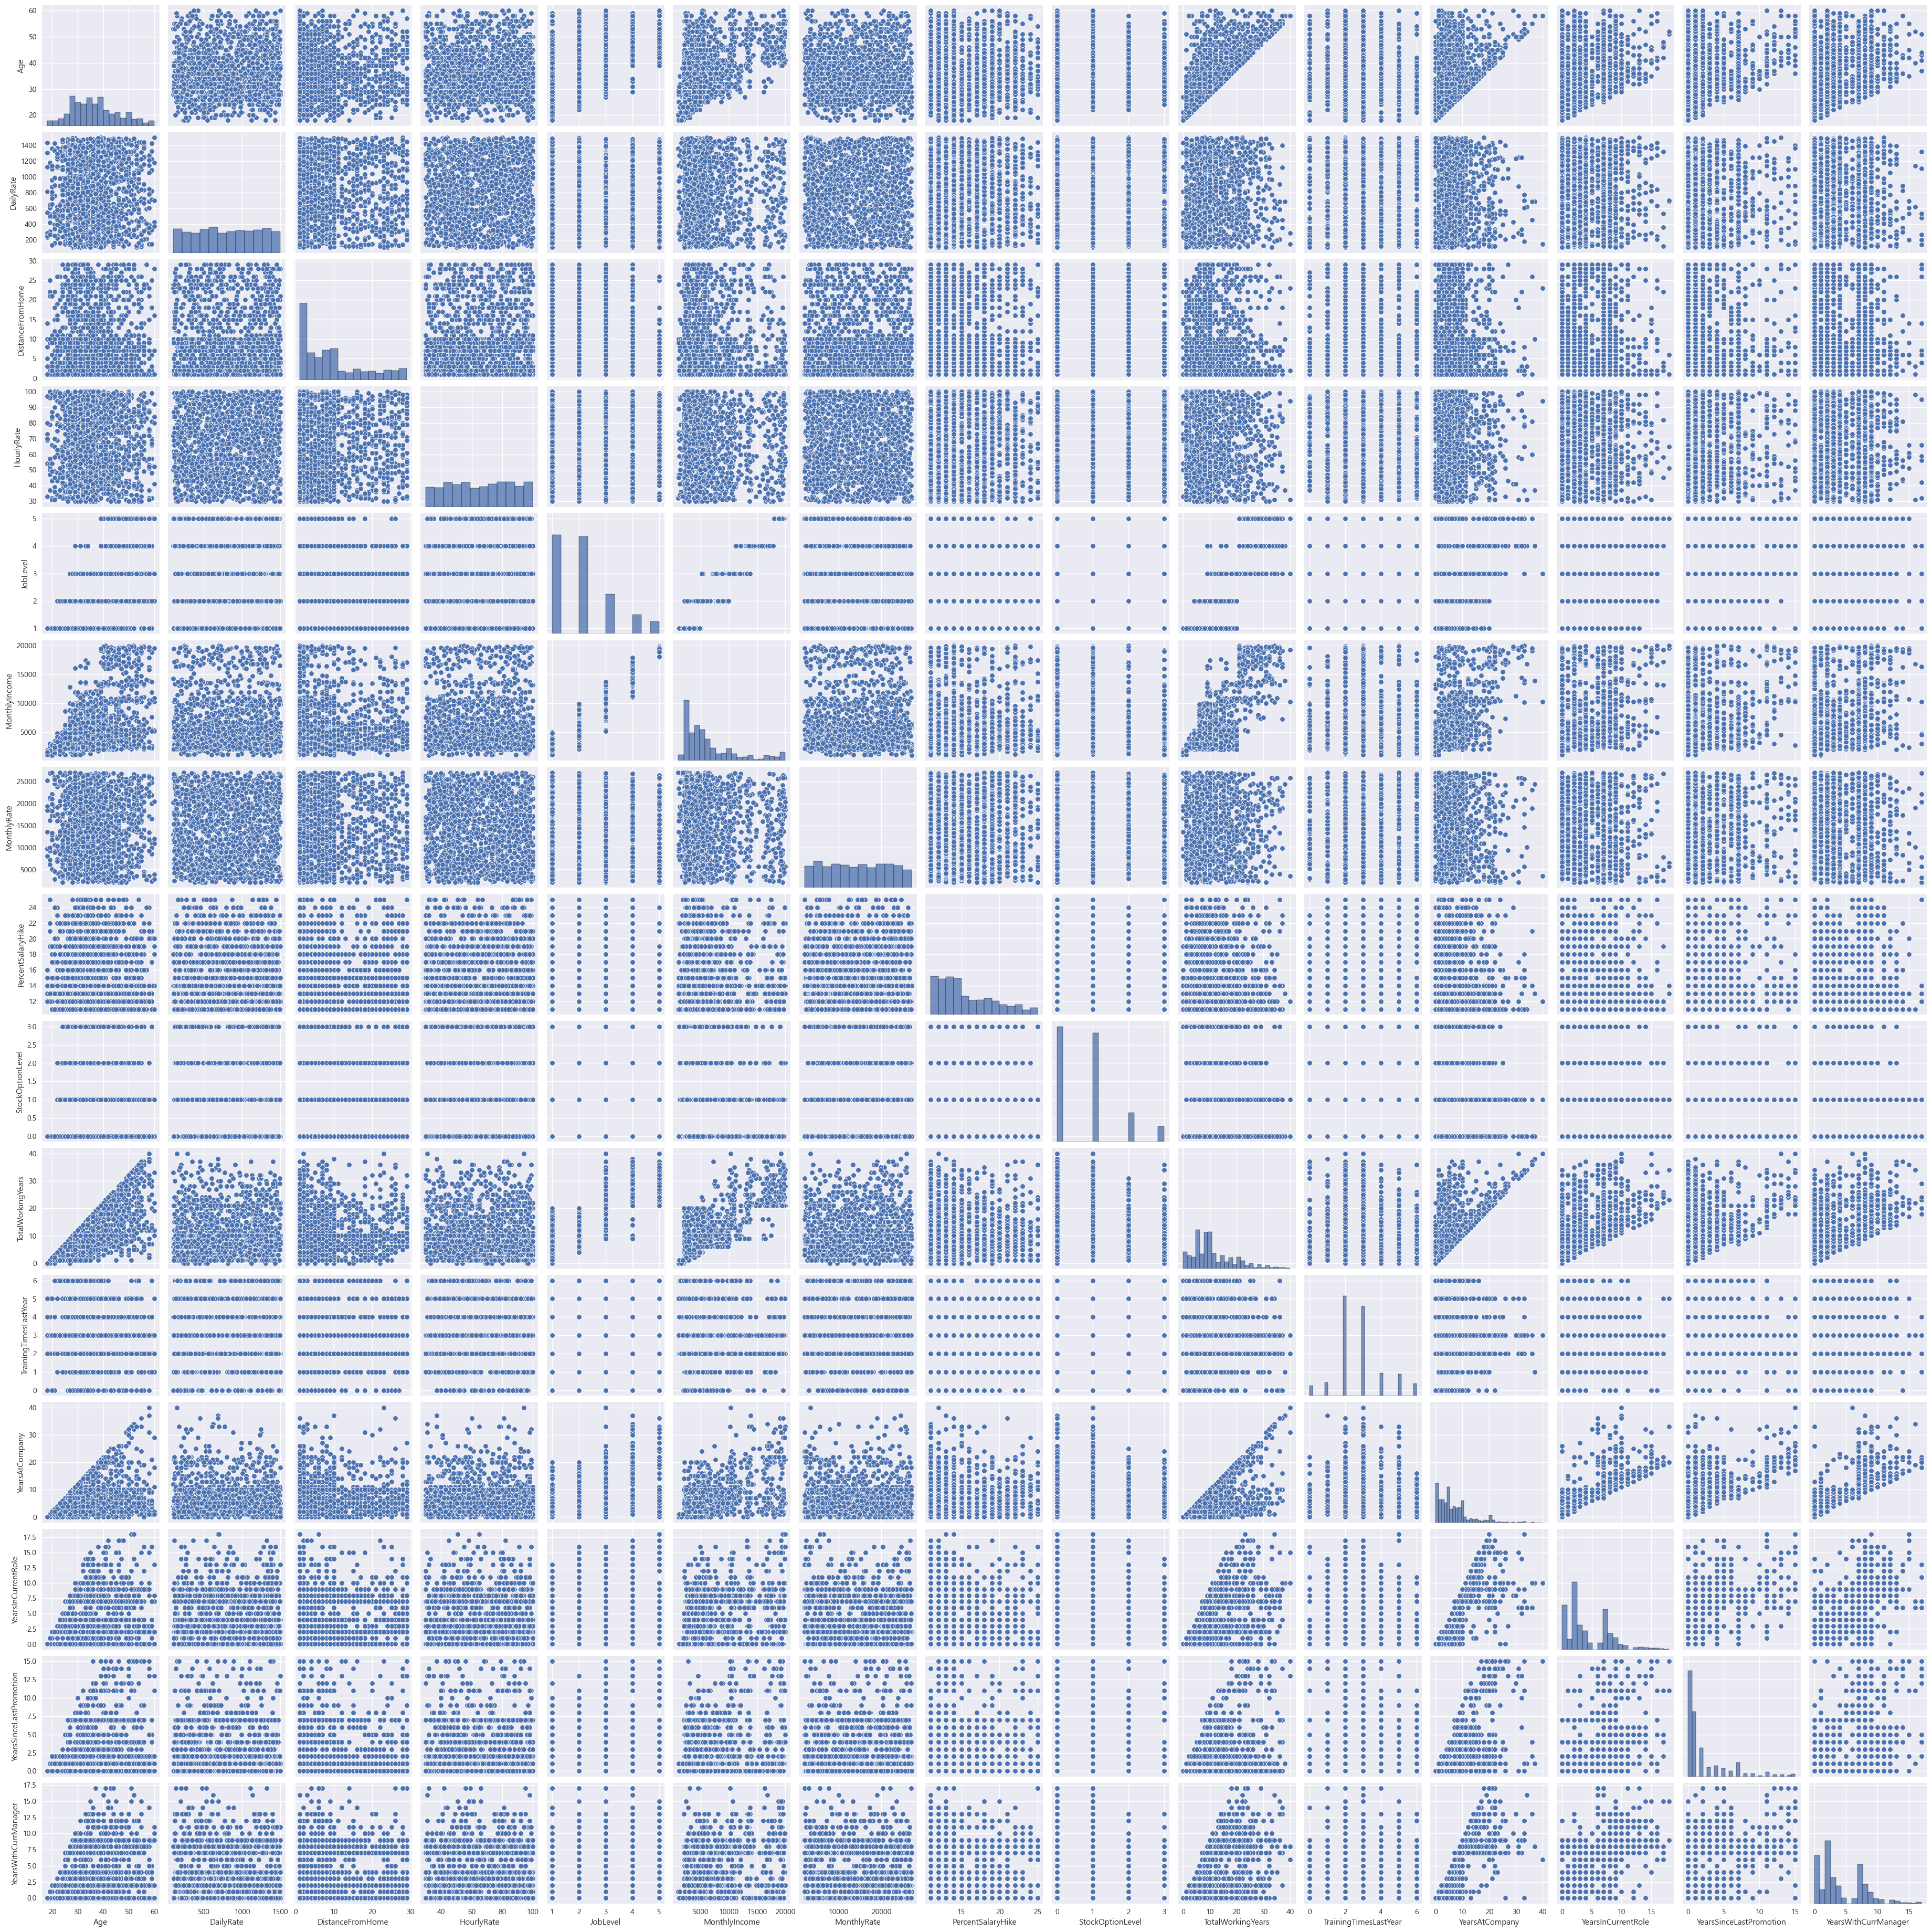

In [33]:
sns.pairplot(data[num_feature]) # 여러 수치형 변수 간 산점도 시각화

- `MonthlyIncome` 과 `TotalExperience`는 서로 양의 상관관계를 가지는 것을 확인할 수 있다. 이는 당연하게 받아들일 수 있다.

* `YearsAtCompany` 와 `TotalWorkingYears` 또한 서로 양의 상관관계를 가지는 것을 확인할 수 있다. 근속연수가 늘면 늘수록 자연스레 당연히 경력도 늘기 때문이다.

나머지 변수들 중에서 양의 상관관계를 가지는 것들 또한 살펴보면, 당연하게 받아들일 수 있는 것들이다.

#### 1-4 파생변수 만들기

* 업무 수준 대비 임금

급여는 target 변수에 큰 기여를 한다. 따라서 업무 수준이 높더라도 급여를 많이 줄 경우에 대한 파생변수를 만들면 좋을 것 같다고 생각이 들었다. 따라서 `MonthlyIncome`을 `JobLevel`로 나누어 업무 수준에 대한 급여 변수를 만들 수 있다.

In [39]:
data['IncomeForJobLevel'] = org['MonthlyIncome'] / data['JobLevel']
data['IncomeForJobLevel'] = data['IncomeForJobLevel'].replace(np.Inf, 0)


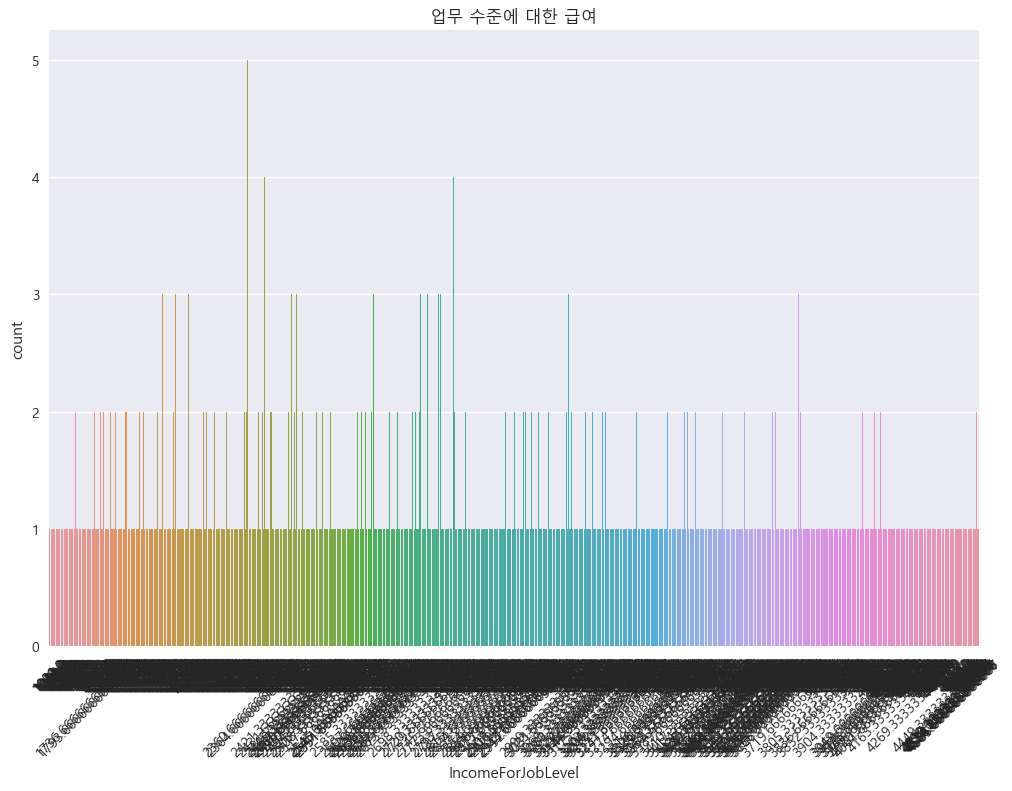

In [40]:
count_plot("IncomeForJobLevel",data,"업무 수준에 대한 급여")

그래프가 원하는 방향으로 잘 나오지 않은 듯 하다...